# Prediction of Accident Security and Pattern Recognition

**Problem Definition:**
To model the prediction of severity of an accident based on factors that are included in such an event.

**Taks Included in current notebook:**
* Loading of data.
* Preprocessing.
* Visualizations.

**Important Observations of this analysis:**
* A very small subset of conditions result in most no. of accidents.
* Narrow roads contribute to a staggering ~70% of accidents.
* As the week progresses saturday being the 1st day of the week, the no. of accidents also increase peaking on friday.

Continue reading to have a detailed analysis of the observations.

#### Loading of data

In [1]:
# Import the required packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

%matplotlib inline

### Read CSV file to DataFrame (df)

The csv file is encoded in latin encoding format hence we will use the encoding parameter

In [2]:
df = pd.read_csv("data/train_PHD.csv", encoding="ISO-8859-1")

Remove the spaces from the column names becomse easy to operate on columns

In [3]:
df.columns = ["_".join(x.split(" ")) for x in df.columns]

#### Preprocessing

### Data Types Checks

* Check if the data types infered by pandas read_csv are correct
* Correct the data types to the expected formats

    **Note**: Pandas stores **strings as object** datatype (So for strings we will see object as datatype)

In [4]:
df.dtypes

Collision_Reference_No.                     int64
Policing_Area                              object
Collision_Severity                          int64
Weekday_of_Collision                       object
Day_of_Collision                            int64
Month_of_Collision                          int64
Hour_of_Collision_(24_hour)               float64
Carriageway_Type                            int64
Speed_Limit                                 int64
Junction_Detail                           float64
Junction_Control                          float64
Pedestrian_Crossing__Human_Control       float64
Pedestrian_Crossing__Physical_Control    float64
Light_Conditions                            int64
Weather_Conditions                          int64
Road_Surface_Conditions                   float64
Special_Conditions_at_Site                float64
dtype: object

In [5]:
df.describe()

,Collision_Reference_No.,Collision_Severity,Day_of_Collision,Month_of_Collision,Hour_of_Collision_(24_hour),Carriageway_Type,Speed_Limit,Junction_Detail,Junction_Control,Pedestrian_Crossing__Human_Control,Pedestrian_Crossing__Physical_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site
count,8562.000000,8562.000000,8562.000000,8562.000000,8307.000000,8562.000000,8562.000000,8317.000000,8286.000000,8326.000000,8294.000000,8562.000000,8562.000000,8321.000000,8331.000000
mean,6549.375380,2.878416,15.702056,6.641556,13.669556,12.223896,42.463794,6.381027,4.144581,1.008167,2.216301,3.236744,4.743635,1.657133,1.060737
std,3927.957169,0.364021,8.801282,3.525814,5.075447,2.706829,14.530785,5.017856,2.866551,0.118775,3.237456,2.070228,3.746747,1.453808,0.495025
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3029.250000,3.000000,8.000000,4.000000,10.000000,13.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,6076.500000,3.000000,16.000000,7.000000,14.000000,13.000000,30.000000,6.000000,4.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000
75%,10078.750000,3.000000,23.000000,10.000000,17.000000,13.000000,60.000000,12.000000,7.000000,1.000000,1.000000,5.000000,9.000000,2.000000,1.000000
max,13147.000000,3.000000,31.000000,12.000000,23.000000,14.000000,70.000000,12.000000,7.000000,3.000000,12.000000,7.000000,10.000000,10.000000,6.000000


### Count missing values and nulls

Lets see how much data is missing

In [6]:
# No. of rows for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8562 entries, 0 to 8561
Data columns (total 17 columns):
Collision_Reference_No.                   8562 non-null int64
Policing_Area                             8317 non-null object
Collision_Severity                        8562 non-null int64
Weekday_of_Collision                      8562 non-null object
Day_of_Collision                          8562 non-null int64
Month_of_Collision                        8562 non-null int64
Hour_of_Collision_(24_hour)               8307 non-null float64
Carriageway_Type                          8562 non-null int64
Speed_Limit                               8562 non-null int64
Junction_Detail                           8317 non-null float64
Junction_Control                          8286 non-null float64
Pedestrian_Crossing__Human_Control       8326 non-null float64
Pedestrian_Crossing__Physical_Control    8294 non-null float64
Light_Conditions                          8562 non-null int64
Weather_Condi

### Imputation filling NAs

If we choose to ignore the na's blindly we are loosing 20% of the data, which is not a very good way to proceed.
Instead lets try to inpute continous columns with a strategy.

**Strategy**
* For Continous variables we will replace the NA values with **MEAN**
* For Categorical/Ordinal variables we will replace the NA values with **MODE**


In [7]:
df.Speed_Limit = df.Speed_Limit.fillna(df.Speed_Limit.mean())

#### Since rest all features/variables are categorical we will replace the NA's in each column with respective columns MODE values

In [8]:
df = df.fillna(df.mode().iloc[0])

### Dtypes conversion

There are two columns with dtypes as objects [Strings in PANDAS], we will have to convert them to some numerical form before we could impute those. Hence we will use LabelEncoder class to encode the columns.

In [9]:
le_PA = preprocessing.LabelEncoder()
le_WD = preprocessing.LabelEncoder()

le_PA.fit(list(df.Policing_Area.unique()))
# le_WD.fit(list(df.Weekday_of_Collision.unique()))
le_WD.fit(["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"])

df.Policing_Area = le_PA.transform(df.Policing_Area)
df.Weekday_of_Collision = le_WD.transform(df.Weekday_of_Collision)

#### Visualization of data

## Visualizations

Lets visualize some data.

Start by checking the class distribution, it turns out class distribution is pretty uneven.

Bullet Points:
* Around 7K points for 1 class.
* Other two classes do not even come close to the most frequent class.

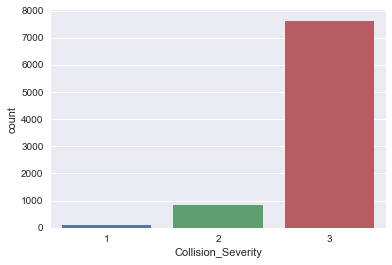

In [10]:
sns.countplot(x=df.Collision_Severity)

**Insight:**
We observe that the data is not correlated, so we can ignore the dimensionality reduction step in the process.
Since all the data available will be usefull to use for model building.

**Note**: The column Collision_Reference_No. is not considered as it has unique values and it should just be a serial number of some sort.

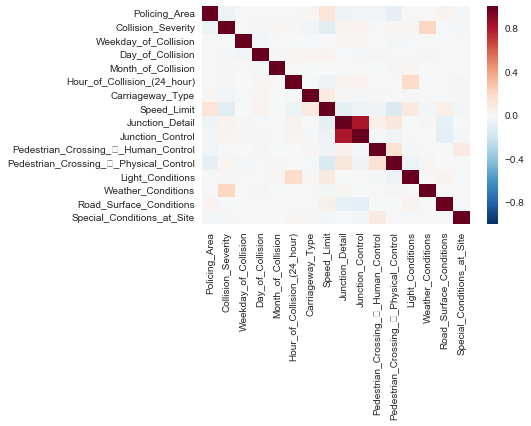

In [11]:
# Correlation plot
sns.heatmap(df[df.columns[1:]].corr())

**Insight:**
From the grouped frequency plot below we observe that Most of the accidents happen during the weekdays, and the number of accidents increase as the week progresses.

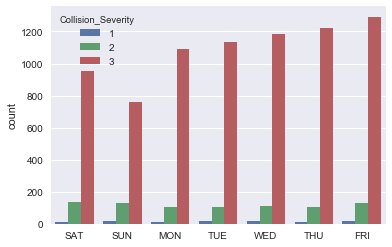

In [12]:
sns.countplot(x=le_WD.inverse_transform(df.Weekday_of_Collision), hue=df.Collision_Severity, order=["SAT", "SUN", "MON", "TUE", "WED", "THU", "FRI"])

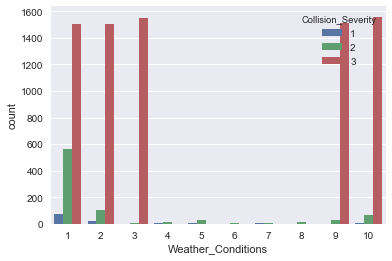

In [13]:
sns.countplot(x=df.Weather_Conditions, hue=df.Collision_Severity)

**Insight:**
From the above plot we can see that weather conditions 1,2,3, 9 and 10 are contributing to severe accidents.
Lets see what those are:
* 1: Fine without High Winds
* 2: Raining without High Winds
* 3: Snowing without High Winds
* 9: Other
* 10: Unknown

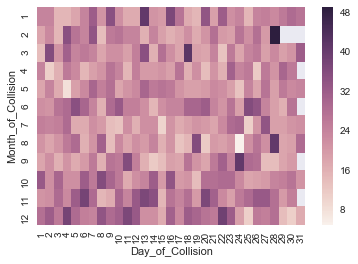

In [14]:
sns.heatmap(df.pivot_table(index="Month_of_Collision", columns="Day_of_Collision", values="Collision_Severity", aggfunc='count'))

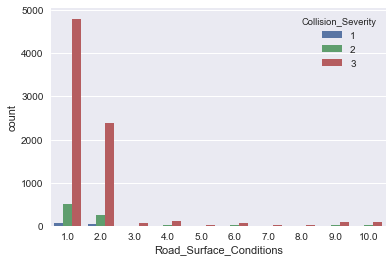

In [15]:
sns.countplot(x=df.Road_Surface_Conditions, hue=df.Collision_Severity)

**Insight:**
Interestingly there is a high chance of server accident if the road conditions are 1 and 2, Since majority of accidents are occured on those two accounts. Lets see what those conditions are:
* 1: Dry
* 2: Wet / Damp

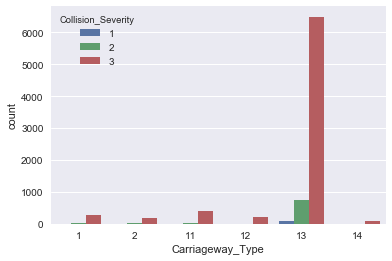

In [16]:
sns.countplot(x=df.Carriageway_Type, hue=df.Collision_Severity)

**Insight:**
Most of the accidents happen on single carriageway.


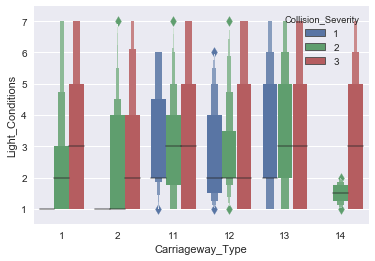

In [17]:
sns.lvplot(y=df.Light_Conditions, x=df.Carriageway_Type, hue=df.Collision_Severity)

**Expectation:**
Expectation was that most of the accidents would happen on narrow roads(13) which are poorly lit (6,7).

**Inference:**
Looking at the plot it appears that most of the accidentsly are caused under light conditions (3,4,5).